<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Bayesian Statistics With Baseball Data: Priors and Posteriors

_Authors: Kiefer Katovich (SF)_

---

Let’s review the general set up for Bayesian modeling. We have:

### $$P\left(\;model\;|\;data\;\right) = \frac{P\left(\;data\;|\;model\;\right)}{P(\;data\;)} P\left(\;model\;\right)$$

This is the diachronic interpretation of Bayes' theorem.

It can also be written as:

### $$posterior \propto likelihood \cdot prior$$

Here, the posterior is an update of our prior belief given the data observed.

## Bayesian Analysis of Batting Averages

---

Load in the simple batting average data for players below. There are just four fields in the data set: the player's name, their times at bat, their hits, and their batting average.

> *Note: [This section of the lab is a partial replication of this exercise in R, if you're interested](https://www.r-bloggers.com/understanding-empirical-bayes-estimation-using-baseball-statistics/). Here, we took out the empirical Bayes section because it's not technically a correct interpretation of Bayesian statistical analysis.*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import beta

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv('./career_hits.csv')

In [4]:
df.head()

,name,hits,at_bat,average
0,Hank Aaron,3771,12364,0.304998
1,Tommie Aaron,216,944,0.228814
2,Andy Abad,2,21,0.095238
3,John Abadie,11,49,0.224490
4,Ed Abbaticchio,772,3044,0.253614


### 1) Find the top and bottom three hitters according to their average.

What is wrong with using the average to find the three best and worst hitters?

In [7]:
# Top hitters by average
df.sort_values('average', ascending=False).head(3)

,name,hits,at_bat,average
5853,John Mohardt,1,1,1.0
9303,Al Wright,1,1,1.0
359,Jeff Banister,1,1,1.0


In [6]:
# Bottom hitters by average
df.sort_values('average').head(3)

,name,hits,at_bat,average
1494,Larry Ciaffone,0,5,0.0
7303,Jay Rogers,0,8,0.0
2552,Ferd Eunick,0,2,0.0


In [ ]:
# A: The issue is that averages only become meaningful when taken over a
# a sufficiently large sample size, which is not what we have above.

### 3) Calculate the maximum a posteriori (MAP) estimate of players' batting averages.

The maximum a posteriori (MAP) estimate is the mode of a posterior distribution for a statistical parameter.

In our case, the MAP estimate for our players' batting averages will be the mode of the posterior beta distribution we get from updating our prior distribution with their at bats and hits.

---

> *Note: For an additional overview of the math behind updating the beta distribution posterior and conjugate priors, ([check out this website](https://alexanderetz.com/2015/07/25/understanding-bayes-updating-priors-via-the-likelihood/)).*

We need to update our beta distribution’s prior belief about batting averages with a player's at-bat and hit information to get a _new_ beta posterior distribution for that player's batting average. 

Luckily, with the beta distribution, the update is just a matter of adding in our new observations to the alpha and beta parameters, where alpha is the number of hits and beta is the number of misses/strikes:

    observed_hits = n_hits
    observed_misses = n_misses
    beta_prior = Beta(prior_hits+1, prior_misses+1)
    beta_posterior = Beta(prior_hits + n_nits + 1, prior_misses + n_misses + 1)
    
> **Note:** This process will also be useful in the context of A/B testing, which we’ll look at later on.

For each player, update the prior to the posterior distribution and calculate the mode of the distribution. The mode of a beta distribution is conveniently defined as:

### $$ \frac{\alpha - 1}{\alpha + \beta -2} $$

Which means we don't even need to use SciPy's beta distribution function. Just calculate the new alpha (hits) and beta (misses) for each player's posterior beta distribution and plug them into the formula above to get the MAP estimate of batting the average.

In [8]:
# 2016 mean BA was .255
alpha_pri = 255 + 1
beta_pri = 1000 - alpha_pri + 1

In [9]:
df.columns

Index(['name', 'hits', 'at_bat', 'average'], dtype='object')

In [23]:
def map_map(row):
    alpha_pri = 255 + 1
    beta_pri = 1000 - alpha_pri + 1
    alpha_post = row['hits'] + alpha_pri
    beta_post = row['at_bat'] - row['hits'] + beta_pri
    return (alpha_post - 1) / (alpha_post + beta_post - 2)

df['MAP'] = df.apply(map_map, axis=1)

### 4) Look up the top and bottom batters according to the MAP estimate.

In [24]:
df.sort_values('MAP', ascending=False).head()

,name,hits,at_bat,average,MAP
3938,Rogers Hornsby,2930,8173,0.358497,0.347253
4118,Shoeless Joe Jackson,1772,4981,0.355752,0.338963
2109,Ed Delahanty,2596,7505,0.345903,0.335254
4407,Willie Keeler,2932,8591,0.341287,0.332325
3475,Billy Hamilton,2158,6268,0.344288,0.332049


In [25]:
df.sort_values('MAP').head()

,name,hits,at_bat,average,MAP
598,Bill Bergen,516,3028,0.170410,0.191458
6459,Ray Oyler,221,1265,0.174704,0.210247
7446,Mike Ryan,370,1920,0.192708,0.214114
2426,Henry Easterday,203,1129,0.179805,0.215226
1082,Fritz Buelow,256,1334,0.191904,0.219031


### 5) Plot the MLE batting average against the MAP batting average.

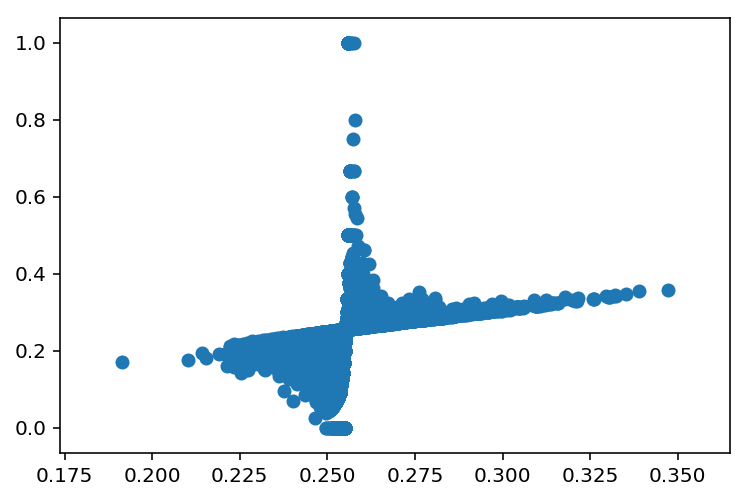

In [33]:
plt.scatter(df['MAP'], df['average'])
plt.xlabel='Max a posteriori estimate'
plt.ylabel='True BA';